In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

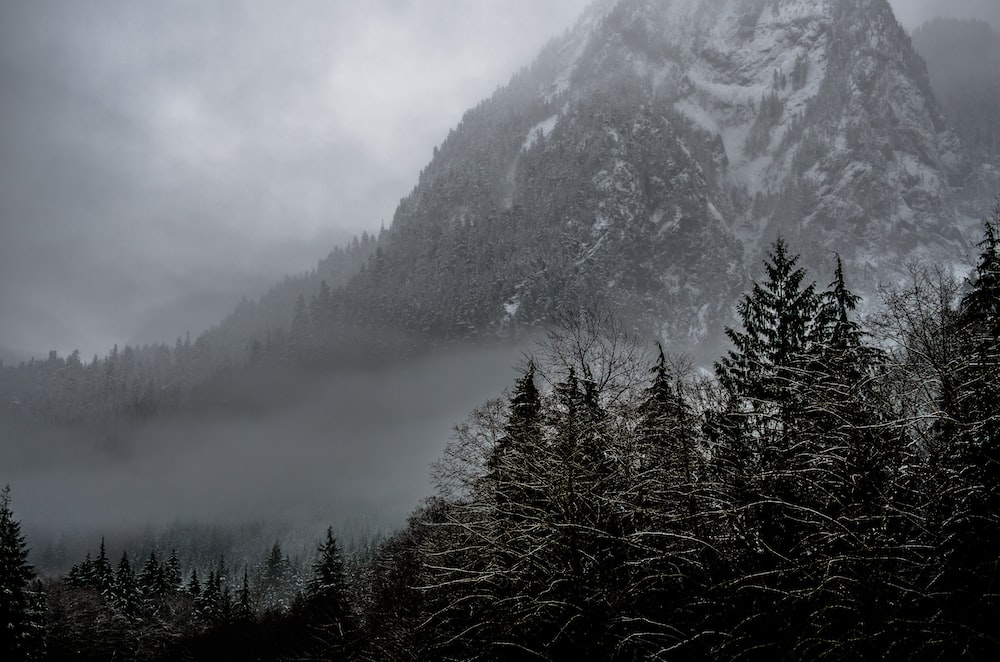

In [3]:
fogg = cv2.imread("fogg.jpeg" , cv2.IMREAD_COLOR)
fogg = cv2.cvtColor(fogg , cv2.COLOR_BGR2RGB)

Image("fogg.jpeg")

Incraesing or Decreasing brightness

Text(0.5, 1.0, 'Darker')

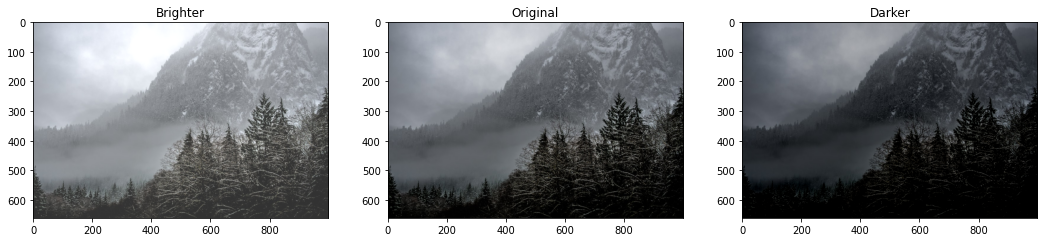

In [14]:
matrix = np.ones(fogg.shape , dtype="uint8")*50

fogg_brighter = cv2.add(fogg , matrix)
fogg_darker = cv2.subtract(fogg, matrix)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.imshow(fogg_brighter)
plt.title("Brighter")

plt.subplot(132)
plt.imshow(fogg)
plt.title("Original")

plt.subplot(133)
plt.imshow(fogg_darker)
plt.title("Darker")

Multiplication or Contrast

* Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.
* Contrast is the difference in the intensity values of the pixels of an image.
* Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

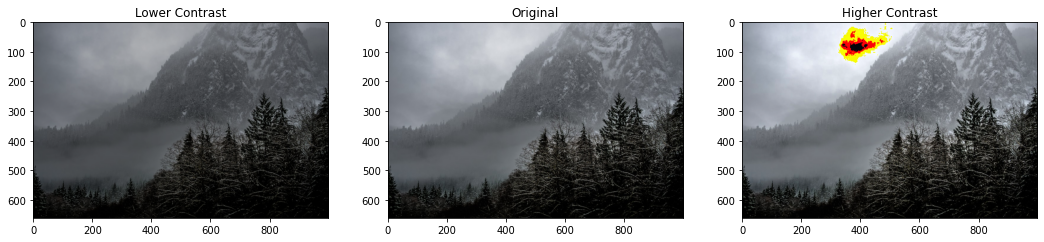

In [15]:
matrix1 = np.ones(fogg.shape) * 0.8
matrix2 = np.ones(fogg.shape) * 1.2

fogg_darker   = np.uint8(cv2.multiply(np.float64(fogg), matrix1))
fogg_brighter = np.uint8(cv2.multiply(np.float64(fogg), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(fogg_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(fogg);         plt.title("Original");
plt.subplot(133); plt.imshow(fogg_brighter);plt.title("Higher Contrast");

The weird colors in higher contrast are because of the fact that some pixels in that region already had values closer to 255 and after multiplication with 1.2 , the resulting product became greater than 255 and hence the overflow issue.

Handling the overflow issue using np.clip

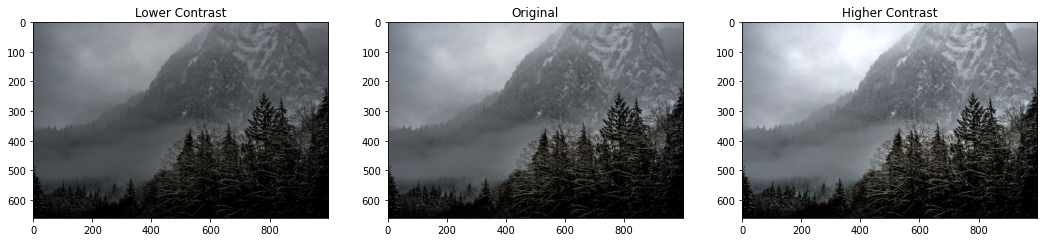

In [5]:
matrix1 = np.ones(fogg.shape) * 0.8
matrix2 = np.ones(fogg.shape) * 1.2

fogg_darker   = np.uint8(cv2.multiply(np.float64(fogg), matrix1))
fogg_brighter = np.uint8(np.clip(cv2.multiply(np.float64(fogg), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(fogg_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(fogg);         plt.title("Original");
plt.subplot(133); plt.imshow(fogg_brighter);plt.title("Higher Contrast");

Image Thresholding

retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )

* src: input array (multiple-channel, 8-bit or 32-bit floating point).

* thresh: threshold value.

* maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

* type: thresholding type (see ThresholdTypes).

(408, 612)


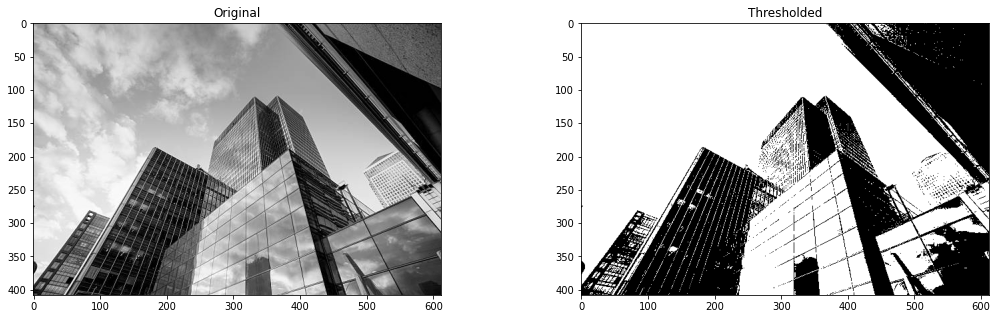

In [6]:
window = cv2.imread("windows.jpg" , cv2.IMREAD_GRAYSCALE)

retval, img_thresh = cv2.threshold(window, 120, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(window, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

Application: Sheet Music Reader

Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

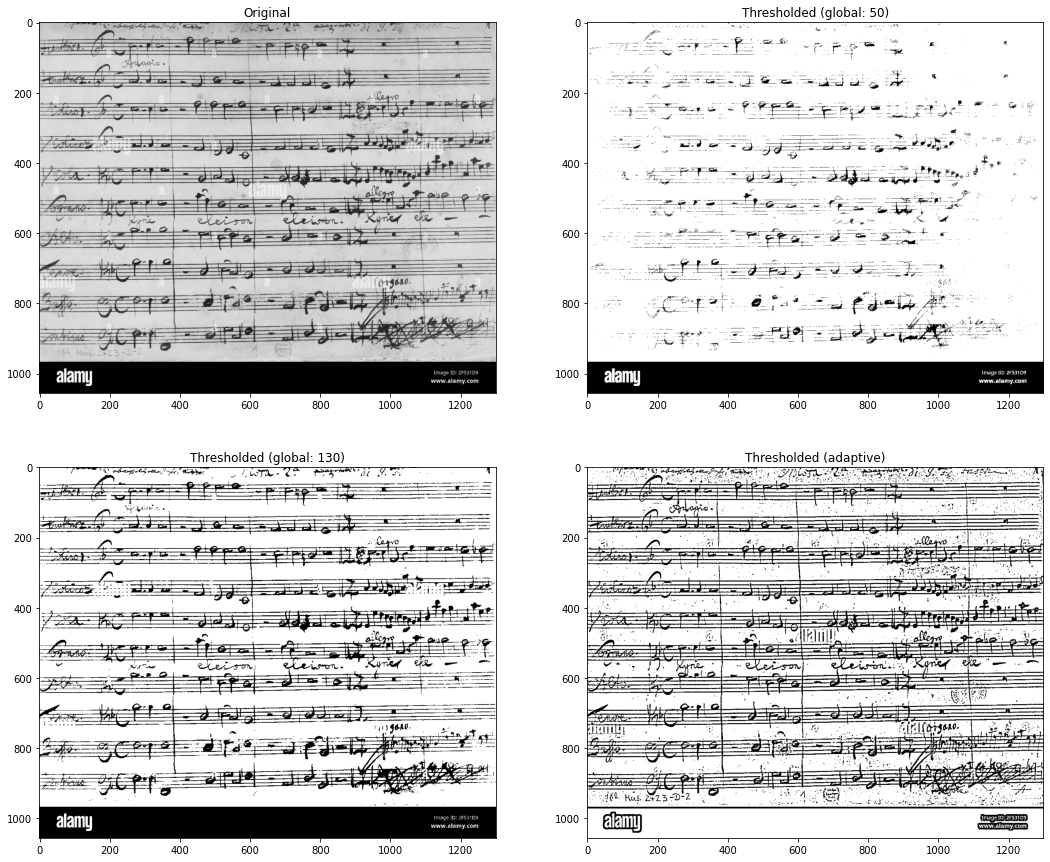

In [12]:
# Read the original image
img_read = cv2.imread("notes.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

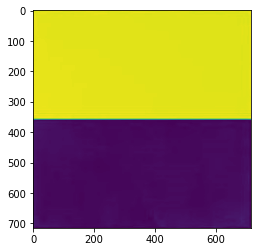

In [28]:
img_rec = cv2.imread("rect.jpeg", cv2.IMREAD_GRAYSCALE)
desired_width = 715
desired_height = 715
dim = (desired_width, desired_height)


resized_rec = cv2.resize(img_rec, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_rec)

Bitwise Operations

Function Syntax

Example API for cv2.bitwise_and(). Others include:

cv2.bitwise_or()
cv2.bitwise_xor()
cv2.bitwise_not()

The function has 2 required arguments:

src1: first input array or a scalar.

src2: second input array or a scalar.

(715, 715)


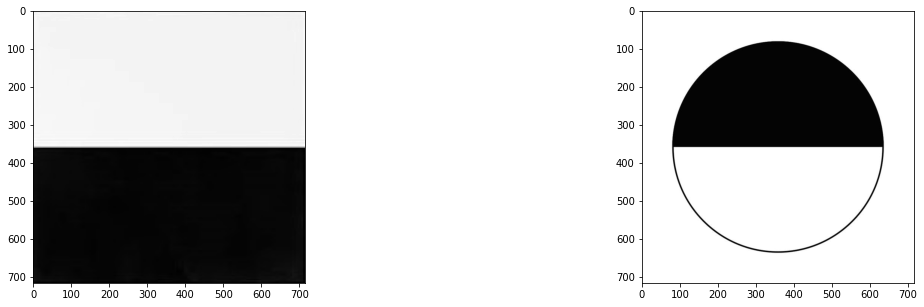

In [31]:


img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(resized_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(resized_rec.shape)

In [27]:
print(img_cir.shape)

(715, 715)


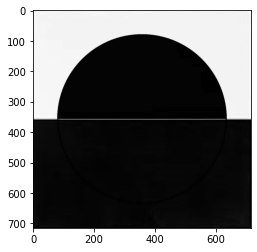

In [36]:
# AND operator

result = cv2.bitwise_and(resized_rec , img_cir , mask=None)
plt.imshow(result , cmap="gray")

AND : only white on white yields white rest combination black

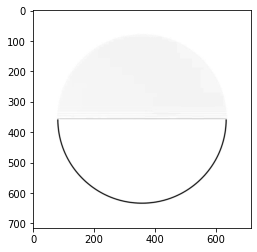

In [37]:
# OR operator
result = cv2.bitwise_or(resized_rec , img_cir , mask=None)
plt.imshow(result , cmap="gray")

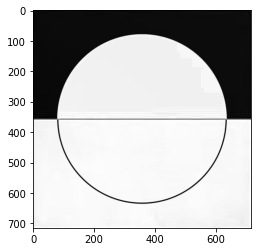

In [38]:
#bitwise XOR

result = cv2.bitwise_xor(resized_rec , img_cir , mask=None)
plt.imshow(result , cmap="gray")

Application: Logo Manipulation

(980, 1470, 3)


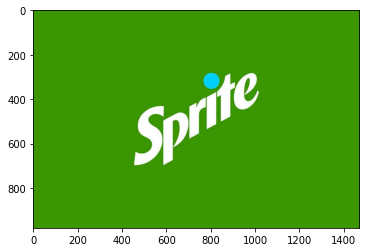

In [79]:
img_bgr = cv2.imread("sprite.jpg")
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)
print(img_bgr.shape)



(900, 900, 3)
(980, 1470, 3)


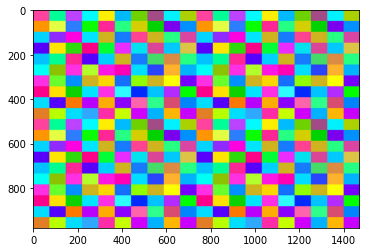

In [85]:
img_background_bgr = cv2.imread("bg.jpg")
img_background_rgb = cv2.cvtColor(img_background_bgr , cv2.COLOR_BGR2RGB)
#plt.imshow(img_background_rgb)
print(img_background_bgr.shape)

img_background_bgr = cv2.resize(img_background_bgr , dsize=(1470, 980),interpolation=cv2.INTER_AREA )
print(img_background_bgr.shape)
plt.imshow(img_background_bgr)

Create Mask for original Image

(980, 1470)


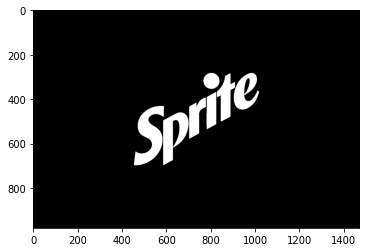

In [80]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

Invert the mask

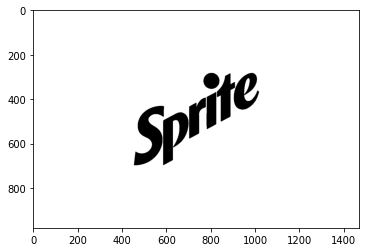

In [81]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

Apply background on the Mask

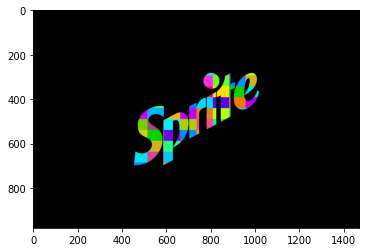

In [86]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_bgr, img_background_bgr, mask=img_mask)
plt.imshow(img_background)

Isolate foreground from image

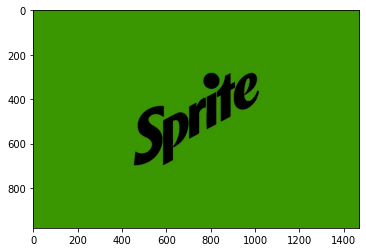

In [87]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_bgr, img_bgr, mask=img_mask_inv)
plt.imshow(img_foreground)

Result: Merge Foreground and Background

True

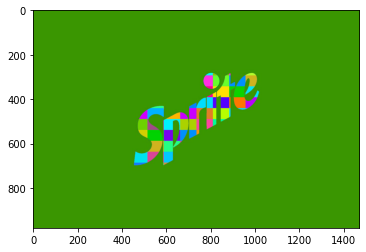

In [88]:
# Add the two previous results obtain the final result
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])